# seq2net-demo

In [1]:
import seq2net
import numpy as np
import pandas as pd
import os
from datetime import datetime
import igraph
import cairo

The data from this demo are taken from observations of one focal group of blue monkeys (_Cercopithecus mitis_) in the year 2015. The animals live in Kakamega Forest, Kenya, and the data were collected as a part of Marina Cords's long-term field study there. Marina has graciously agreed to the use of a limited portion of her anonymized data as a demonstration of this package.

The data are included as a CSV in the parent repository of this notebook (Cmitis2015.csv). Each row represents one observation of one behavior for a focal individual. The columns are as follows 

* subj - the ID of the focal subject, ranging from ID1 to ID19
* date - the date of the observation
* beeps - the duration, in minutes, of the behavior
* activity - the activity that was observed (may not be a social activity)
* gm - the focal individual's target partner for directed grooming
* gmd_by - the individual or individuals who grooms the focal individual
* sitco - the individual or individuals sitting in contact with the focal individual
* partner - all individuals who are a social partner (combines gm, gmd_by, sitco)

In [2]:
# get the current directory to work within the seq2net repo on remote machines
curdir = os.path.dirname(os.path.abspath('.'))
path = os.path.join(curdir, "data", "Cmitis2015.csv")

# import data from CSV
data = pd.read_csv(path)

data.date = pd.to_datetime(data.date)

## SequentialData objects
Sequential behavior data is converted into network format by seq2net using the `SequentialData` class. Instantiate a new `SequentialData` object with any pandas dataframe with a column of subject IDs and partner IDs (optionally a column for the duration of activities).

Here we create a `SequentialData` object with the behavior data from January and February 2015:

In [3]:
# create new SequentialData object
sequential = seq2net.SequentialData(data[data.date < pd.to_datetime("2015-03-01")])

## Adjacency matrices
seq2net can create adjacency matrices from any `SequentialData` object using the `adjacency()` method. 

`adjacency()` takes 2 or 3 arguments: `subj`, `soc`, and `count`. These are the names of the columns of the dataframe stored within the `SequentialData` object referring to the subject, their social partner, and the duration of activity. 

If no string is passed to `count`, seq2net assumes that all observations have the same duration and assigns them a duration of '1'.

In [4]:
# create an adjacency matrix for grooming given
data = sequential.get_adj_matrix(subj='subj', soc='partner', count='beeps')

data

array([[0.        , 0.        , 0.00518519, 0.        , 0.        ,
        0.02759135, 0.00074571, 0.00434783, 0.        , 0.00582242,
        0.        , 0.        , 0.        , 0.03134328, 0.        ,
        0.        , 0.01086957, 0.00530303, 0.00380952],
       [0.        , 0.        , 0.        , 0.        , 0.00901578,
        0.        , 0.00575126, 0.01328671, 0.00846262, 0.        ,
        0.01851852, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.00296296, 0.        ,
        0.00948213, 0.        , 0.00141844, 0.00071531, 0.00498575,
        0.        , 0.        , 0.        , 0.01240876, 0.        ,
        0.03194651, 0.        , 0.        , 0.00740741],
       [0.        , 0.00510949, 0.01111111, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.02037846,
        0.        , 0.        , 0.00444444, 0.        , 0.00149254,
        0.   

## igraph networks
seq2net can also output social networks directly as python-igraph `Graph` objects, using the method `network()`. 

`network` takes the same arguments as `adjacency()`, creates the relevant adjacency matrix, and then converts that matrix into an igraph `Graph`.

In [6]:
g = sequential.get_network(subj='subj', soc='partner', count='beeps')

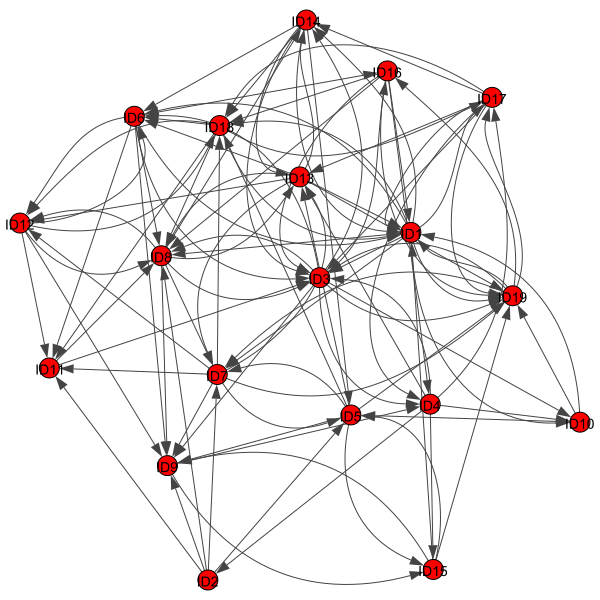

In [7]:
igraph.plot(g)